JaeYoen Park 50194193

MTH 448

Due: 2023/03/19

# Using Pandas to analyze U.S. Baby names

## Introduction

In every countries, it is very important to keep track of their data to prevent any situation they encounter. Not only the data related to Natural resource or GDP, the number of birth is also one important data to be be tracked continuously. The United States Social Security Administration maintains records of babies born in USA each year[1]. They consists of data specified by `Year`, `State`, `Sex`, `Name`, and `Count`. Using Pandas library from Python, it is very efficient to analyze the big amount of data by our preference. For this project, we will be focusing on Name popularity which explores the most popular name by several conditions and analyze the correlation between two or more valuables are considered.


While the data consists of `Year`, `State`, `Sex`, `Name`, and `Count`, we will explore the most popular names by following conditions:

1. Overall most 5 popular names.
2. Most popular names in every year.
3. Most popular names by sex.
4. Most popular names by each state.
5. Most popular names by state in every year.
6. Most popular names by sex in every state.
7. Most popular names by sex in every year.


## Background

Python has a library specialized for data analysis called Pandas. It is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool.

Data from Social Security Website provide Baby name datasets. We will be using `namesbystate.zip` which has count of each baby name for each state in the U.S [1].


Each data contains:

`Year`: 4-digit year of birth (1910 ~ 2021),

`State`: 2-digit state code (50 states), 

`Sex`: M = Male, F = Female, 

`Name`: 2~15 characters, 

`Count`: number of occurrences




## Data Acquisition

### Import Necessary Libraries

In [1]:
%pylab inline
import seaborn as sns
import glob
import pandas as pd
import numpy as np
import plotly.express as px


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Data transformation

Zip file -> Data frame

Zip file contains multiple txt files specified as each state. Reading all the files as csv using glob library, concat all the data into a single data frame.




In [2]:
def load_names_data_into_dataframe(folder_name):
    '''
    file_names: gather all txt files from zip
    
    frames: define columns from the file and read as csv 
    
    df: concat all the data as dataframe    
    '''
    file_names = glob.glob( folder_name + "/*.TXT")

    frames = [pd.read_csv(f, names=["state", "sex", "year","name", "count"]) for f in file_names]

    df = pd.concat(frames)

    return df

In [3]:
# Execute the function above and return dataframe.
folder_name = 'namesbystate'
df = load_names_data_into_dataframe(folder_name)
df

state sex  year     name  count
0        IN   F  1910     Mary    619
1        IN   F  1910    Helen    324
2        IN   F  1910     Ruth    238
3        IN   F  1910  Dorothy    215
4        IN   F  1910  Mildred    200
...     ...  ..   ...      ...    ...
33701    DE   M  2021   Thiago      5
33702    DE   M  2021   Travis      5
33703    DE   M  2021     Troy      5
33704    DE   M  2021   Walker      5
33705    DE   M  2021     Zayn      5

[6311504 rows x 5 columns]

In [4]:
df.columns # Each row contains information of:

Index(['state', 'sex', 'year', 'name', 'count'], dtype='object')

## Name popularity

As the data has 6,311,504 rows, we require a function `most_popular` which intake data frame and return the first head row after sort in descending order by count used. As we compare by different conditions, we first manipulate the data frame by grouping the required conditions then apply the function to return the most popular name within that condition.  

In [5]:
# Sort in descending order then return the first row.
def most_popular(df):
    df = df.sort_values(by="count", ascending=False)
    return df.head(1)

### Overall, which names were most popular?

Overall, only considering the number of occurrences, each 5 names represent most popular and least popular names.
As 'James' was used the most, the possible reasons were because the name has connection to Biblical name. It also had a royal connotation and became more widely popularized when King James VI took over the English throne in the 17th century. Finally, while the name 'James' was more used for boy name, it has become more common as a girl's name. [2]

In [6]:
# Group by name with sum of all counts then return most 5 popular names 
df1 = df[['name','count']]
df1.groupby('name').sum().sort_values(by='count', ascending =False).head(5)

count
name            
James    5054074
John     4910976
Robert   4763102
Michael  4396482
William  3939912

### How has the popularity of various names been changing over the years?

Grouping data by year, we applied the `most_popular` function which returns the most occurrence by count.
According to the result, same names have been most popular for several years. For instance, the name 'Michael' has been mostly used between 1956 to 1993. According to babynames information, Michael was an archangel in the bible. The meaning of the name Michael is a question, "who could possibly be as great as God?"[3]. As discussed from overall popularity, religion seems to given huge impact.



In [7]:
# Group by year then apply "most_popular" function
df2 = df[['year','name','count']].groupby(['year']).apply(most_popular)
df2

year  name  count
year                          
1910 0       1910  Mary   2913
1911 407     1911  Mary   3188
1912 838     1912  Mary   4106
1913 1332    1913  Mary   4739
1914 1862    1914  Mary   5981
...           ...   ...    ...
2017 217416  2017  Emma   2740
2018 221179  2018  Emma   2746
2019 392253  2019  Noah   2677
2020 395116  2020  Noah   2625
2021 397909  2021  Noah   2591

[112 rows x 3 columns]

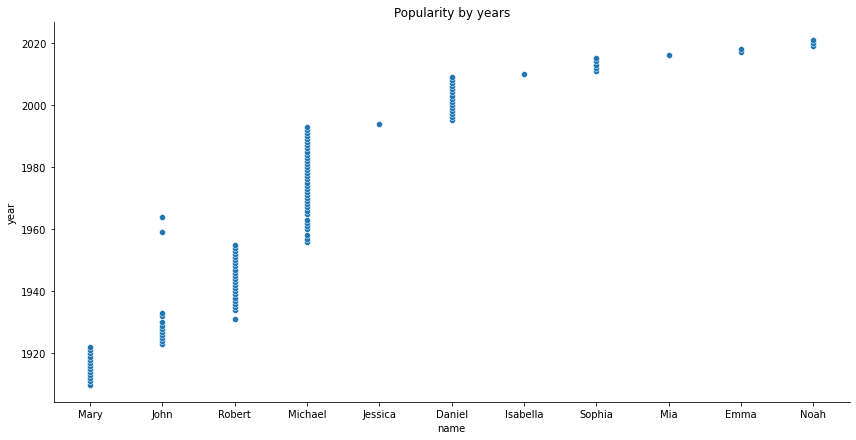

In [8]:
# Shows timeline which name was most popular
sns.relplot(data=df2,
            x="name",
            y="year",
            sizes=(5,400),
            height=6,
            aspect=2
).set(title='Popularity by years')

### What is the most popular name for each boys and girls?

Usually parents determine their children names by sex. It is quiet important factor since names are often provide big hints to verify their sex. Grouping data by sex, 'Mary' was mostly used for girls and 'Robert' for boys. According to Very well family, the name Mary was derived from the ancient Hebrew name Miriam. It was the name of Moses’ sister in the Old Testament of the Bible. It also have a meaning such as 'beloved' which be one of the attracting factor for a baby girls name[5]. The name Robert is originated from old German name that means “bright fame” from name Hrodebert.  It was introduced to the people of England by the Normans in the middle ages [4].

In [9]:
#Group by sex then apply "most_popular" function
df3 = df[['name','sex','count']].groupby(['sex']).apply(most_popular)
df3

name sex  count
sex                          
F   4533      Mary   F   8184
M   199633  Robert   M  10026

[Text(0.5, 1.0, 'Popularity by Sex')]

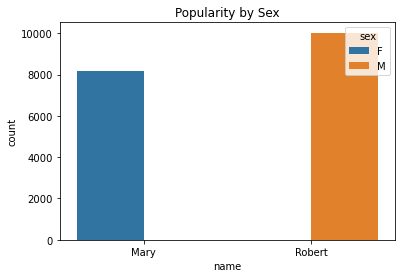

In [10]:
#Show each boy and girl name that was most popular
sns.barplot(data=df3,
            x="name",
            y="count",
            hue='sex'

).set(title='Popularity by Sex')

### What is the most popular name at each states?

While each states had their most popular names, many of the states shared the most popular name in common. In 50 different states, there were 8 different names that have been popular. This shows that out of 32403 names, only 8 names dominate popularity. From the plot, especially the name "Michael" and "Linda" were taking 52% of the 50 states.
As mentioned with the name "Michael", "Linda" also contained the meaning "Pretty". However, from the US popular names, "Linda" was not originated from the Bible. According to nameberry, name Linda is girl's name of Spanish, Italian, Portuguese origin meaning "pretty"[6].

In [11]:
#Group by state 
df4 = df[['name','state','count']].groupby(['state'])
df4

In [12]:
df.groupby('name').count() # Show how many different names were used between 1910-2021.

state  sex  year  count
name                             
Aaban         2    2     2      2
Aadam         1    1     1      1
Aadan         4    4     4      4
Aadarsh       2    2     2      2
Aaden       263  263   263    263
...         ...  ...   ...    ...
Zyria        14   14    14     14
Zyriah       10   10    10     10
Zyron         1    1     1      1
Zyrus         1    1     1      1
Zyshonne      1    1     1      1

[32403 rows x 4 columns]

In [13]:
# Apply "most_popular function"
overall_state = df4.apply(most_popular)
overall_state

name state  count
state                              
AK    21133    Michael    AK    207
AL    93487      James    AL   3038
AR    71431      James    AR   1621
AZ    90631    Michael    AZ   1045
CA    263272   Michael    CA   8262
CO    10269      Linda    CO   1037
CT    54901     Robert    CT   1624
DC    34878       John    DC    883
DE    22077    Michael    DE    311
FL    165318   Michael    FL   3493
GA    123669     James    GA   3065
HI    36752    Michael    HI    325
IA    14271      Linda    IA   2365
ID    6774       Linda    ID    530
IL    162025   Michael    IL   6221
IN    15794      Linda    IN   3014
KS    13124      Linda    KS   1387
KY    84640      James    KY   2553
LA    105328   Michael    LA   1671
MA    82901     Robert    MA   3895
MD    77230    Michael    MD   1790
ME    8216       Linda    ME    778
MI    130104   Michael    MI   4925
MN    14876      Linda    MN   2144
MO    18717      Linda    MO   2797
MS    78517      James    MS   2277
MT    6644       Linda    MT    473
NC    119398     James    NC   3882
ND    7986       Linda    ND    497
NE    10814      Linda    NE   1055
NH    26529     Robert    NH    447
NJ    109712      John    NJ   3701
NM    8735        Mary    NM    589
NV    35327    Michael    NV    341
NY    199633    Robert    NY  10026
OH    21889      Linda    OH   5885
OK    18327      Linda    OK   2064
OR    7956       Linda    OR   1121
PA    4533        Mary    PA   8184
RI    27715     Robert    RI    682
SC    80185      James    SC   2316
SD    7887       Linda    SD    507
TN    97326      James    TN   3281
TX    36370      Linda    TX   5059
UT    17214   Jennifer    UT    702
VA    99707      James    VA   2679
VT    4643       Linda    VT    325
WA    11140      Linda    WA   1750
WI    82244      David    WI   2403
WV    14826      Linda    WV   1796
WY    3765       Linda    WY    229

In [14]:
# Pie chart showing the percentage of most popular names over 50 states.
fig = px.pie(overall_state, values='count',names='name', title = 'Most popular names from 50 states')
fig.show()

### How has the popularity of names changed at each state over the years?

Focusing on the relationship between `year` and `state`, we have showed most popular name at each state over each years. From the big amount of data, we looked at 1910 data whether popular name effected in not only one state but all other states in certain year. As shown below, Only 3 different names appeared from 50 different states. Especially name 'Mary' was used the most. According to very well family, Mary was the most popular baby name for girls in America for over sixty years, from the 1880s until the year 1946[5].  

In [15]:
# Group by year and state then apply "most_popular" function, return first 10 rows due to large amount of data.
df5 = df.groupby(['year','state']).apply(most_popular)
df5[:10]

state sex  year  name  count
year state                               
1910 AK    0    AK   F  1910  Mary     14
     AL    0    AL   F  1910  Mary    875
     AR    0    AR   F  1910  Mary    408
     AZ    0    AZ   F  1910  Mary     74
     CA    0    CA   F  1910  Mary    295
     CO    0    CO   F  1910  Mary    193
     CT    0    CT   F  1910  Mary    304
     DC    0    DC   F  1910  Mary     80
     DE    0    DE   F  1910  Mary     59
     FL    0    FL   F  1910  Mary    239

In [16]:
# search for data for year in 1910 and return first 5 rows in order to see the specific area for details.
df6 = df5[df5['year'] == 1910]
df6[:5]

state sex  year  name  count
year state                               
1910 AK    0    AK   F  1910  Mary     14
     AL    0    AL   F  1910  Mary    875
     AR    0    AR   F  1910  Mary    408
     AZ    0    AZ   F  1910  Mary     74
     CA    0    CA   F  1910  Mary    295

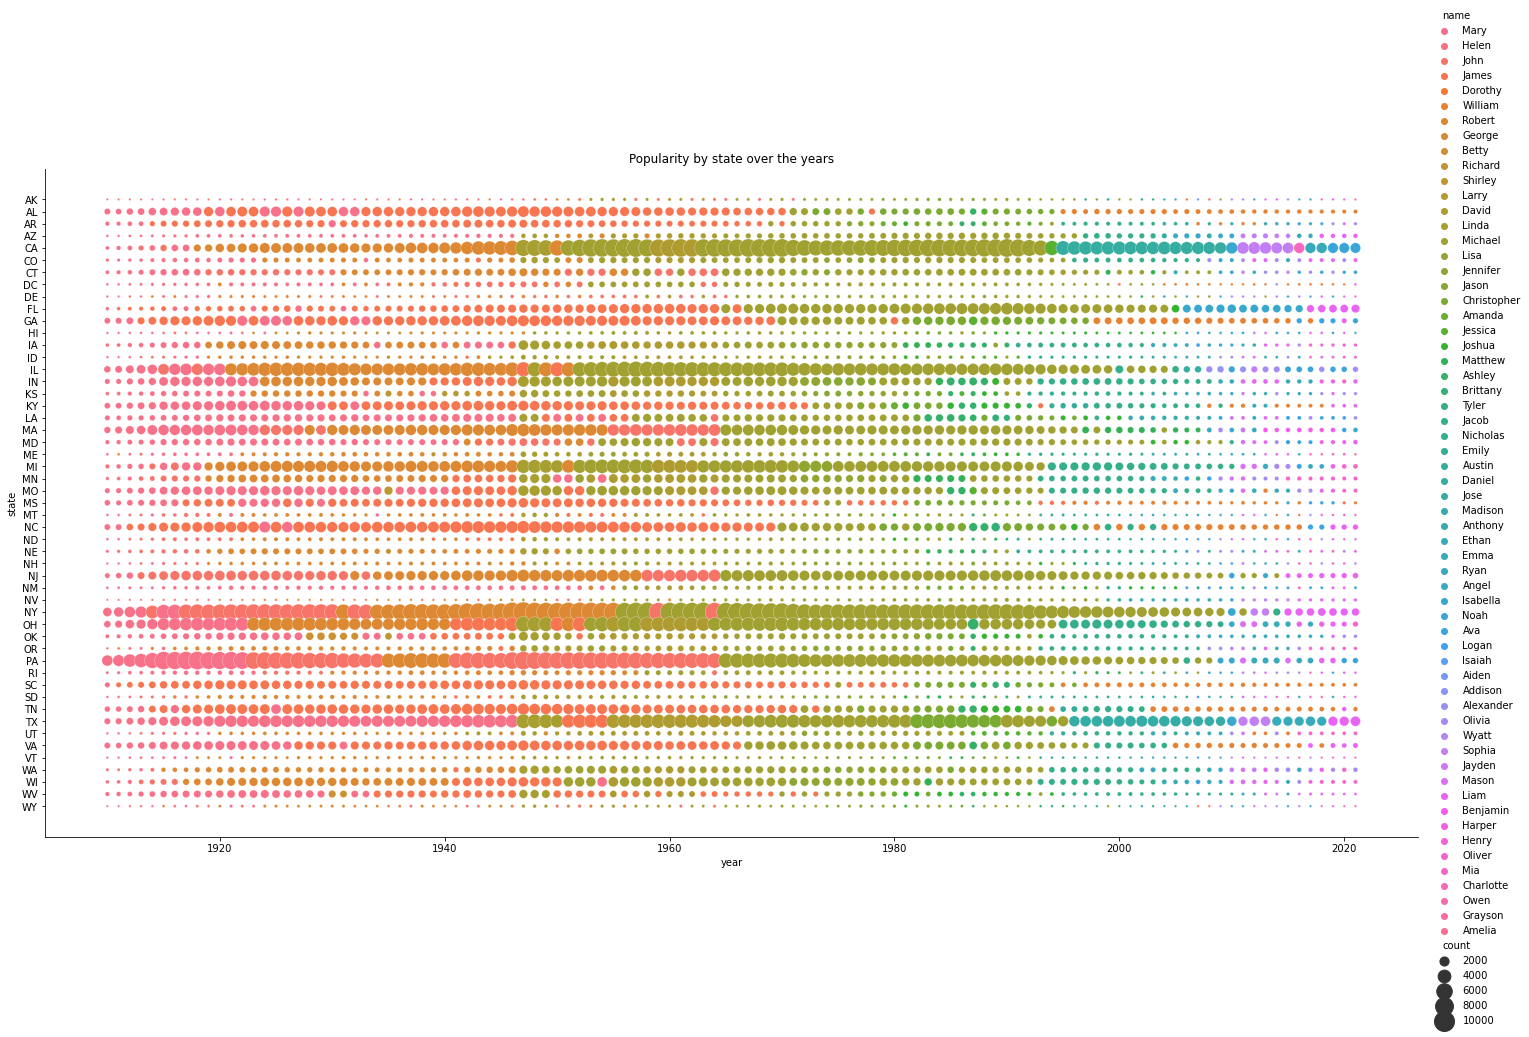

In [17]:
# Shows overall time line for popular name by state over the years
# Shows popularity  were remained for several years of each name by looking at the hue.
sns.relplot(data=df5,
            x="year",
            y="state",
            hue='name',
            size='count',
            sizes=(5,400),
            height=10,
            aspect=2
).set(title='Popularity by state over the years')

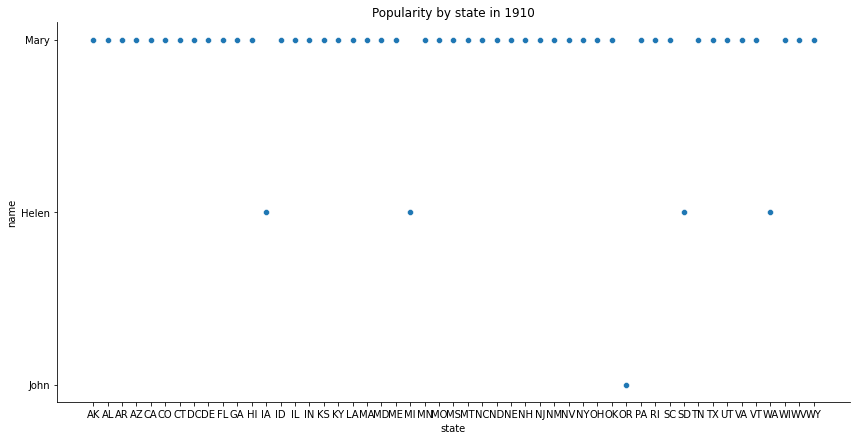

In [18]:
# Shows that 3 different names were dominating the usage in all states in 1910.
sns.relplot(data=df6,
            x="state",
            y="name",
            sizes=(5,400),
            height=6,
            aspect=2
).set(title='Popularity by state in 1910')

In [19]:
# Pie chart shows the percentage of usage in each names during 1910
fig = px.pie(df6, values='count',names='name', title = 'Most popular names by all states in 1910')
fig.show()

### How has the popularity of name changed by sex over the years?

How will the popularity of names differ by relation between sex over the years?
As mentioned above from 'Most popular name by sex', sex is one of the strong factor that divide the result that has small chance to overlap. Not only applies in US, also most of the countries have their preferable names by each sex.
As US have strong religious belief in Christianity, such names like "Mary", "John", "Robert", and "Lisa" were used popular. According to verywell family, the name John is derived from the Bible, Hebrew Yohanan, meaning “graced by God.”[7]. Likewise, girls name usually contains "love","Affection" while boys name usually contains "Great", "Royal",etc. 

In [20]:
# Group by year and sex then apply "most_popular" function which shows popular name for each sex over the years.
df7 = df.groupby(['year','sex']).apply(most_popular)
df7

state sex  year    name  count
year sex                                      
1910 F   0         PA   F  1910    Mary   2913
     M   118653    PA   M  1910    John   1326
1911 F   407       PA   F  1911    Mary   3188
     M   118906    PA   M  1911    John   1672
1912 F   838       PA   F  1912    Mary   4106
...               ...  ..   ...     ...    ...
2019 M   392253    CA   M  2019    Noah   2677
2020 F   228531    CA   F  2020  Olivia   2350
     M   395116    CA   M  2020    Noah   2625
2021 F   232145    CA   F  2021  Olivia   2395
     M   397909    CA   M  2021    Noah   2591

[224 rows x 5 columns]

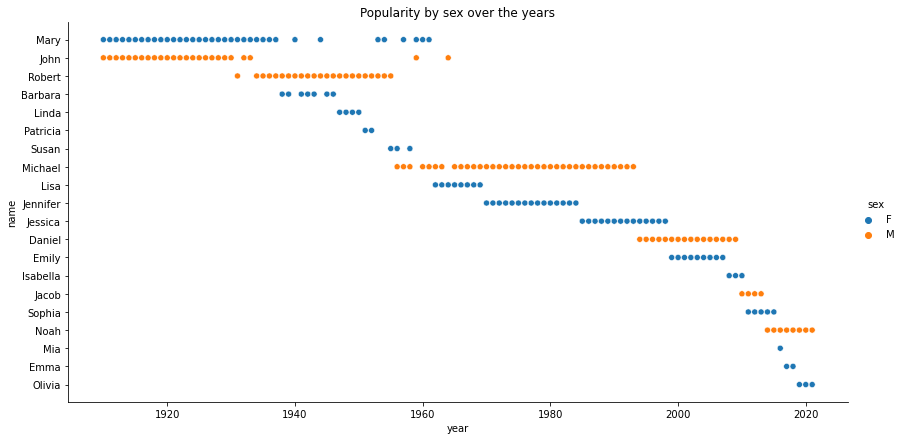

In [21]:
# Shows the timeline which name was most popular with sex 
sns.relplot(data=df7,
            x="year",
            y="name",
            hue = 'sex',
            sizes=(5,400),
            height=6,
            aspect=2
).set(title='Popularity by sex over the years')

### What is the most popular name by sex for each states?

Grouping by `sex` and `state`, we showed most popular name for each boy and girl by every states. According to the plot, total of 10 names where were most used over 50 states. From the 10 most popular names, girl name "Linda" and boy name "Michael" were the most popular around the states. "Linda" was used 31 out of 50 states and "Michael" was used 12 out of 50 states. As mentioned above from popularity by state, the sum of two names were also taking over 52% of all states[3][6].  

In [22]:
# Group by state and sex then apply "most_popular" function to show popular name by sex for each state
df8 = df.groupby(['state','sex']).apply(most_popular)
df8

state sex  year     name  count
state sex                                      
AK    F   7351     AK   F  1985  Jessica    164
      M   21133    AK   M  1982  Michael    207
AL    F   7899     AL   F  1925     Mary   2694
      M   93487    AL   M  1947    James   3038
AR    F   18116    AR   F  1948    Linda   1424
...               ...  ..   ...      ...    ...
WI    M   82244    WI   M  1955    David   2403
WV    F   14826    WV   F  1947    Linda   1796
      M   55958    WV   M  1947    James   1681
WY    F   3765     WY   F  1948    Linda    229
      M   18767    WY   M  1955    David    194

[102 rows x 5 columns]

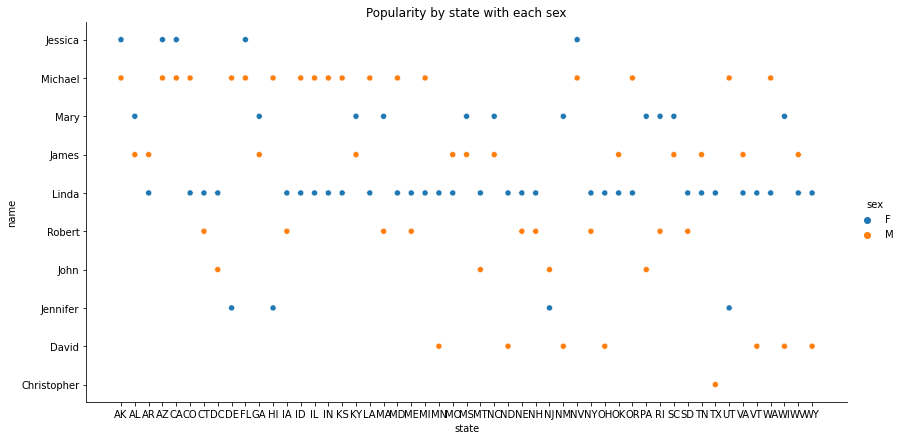

In [23]:
# Shows which states used one of the most popular names within each sex
sns.relplot(data=df8,
            x="state",
            y="name",
            hue='sex',
            sizes=(5,400),
            height=6,
            aspect=2
).set(title='Popularity by state with each sex')

In [24]:
df8[df8['name'] == 'Linda'].count() # Linda was most popular in 31 states out of 50

state    31
sex      31
year     31
name     31
count    31
dtype: int64

In [25]:
df8[df8['name'] == 'Michael'].count() # Linda was most popular in 18 states out of 50

state    18
sex      18
year     18
name     18
count    18
dtype: int64

## Conclusion

Simple definition of data is collection of information. Data is one of the important elements to understand information from the past to the present and to derive better results in the future. From Baby names project, we have used Baby name data from United States Social Security Administration to analyze large amount of data by using Python with library Pandas. While it can be looked at from various aspects, but we analyzed it by focusing on name popularity according to conditions. We focused on 3 conditions which are `Year`, `State`, and `Sex`. By comparing the relationship between 2 variables each, there was one clear commonality which US name popularity were deeply related to Christianity. They tend to decide the name by meaning from the Bible where boy name prefer masculine words "Strong", "Royal", and "Bright" while girl name prefer feminine words "Love", "Affection", and "Blessed". Therefore, we were able to conclude that US parents consider the meaning when naming babies where they tend to bring it from Bible. 

## References

1.Social Security. Popular Baby Names. (n.d.). Retrieved March 19, 2023, from https://www.ssa.gov/oact/babynames/limits.html https://www.ssa.gov/oact/babynames/limits.html [1]

2.Bradley, S. (2023, March 8). James Name Meaning. Verywell Family. from
https://www.verywellfamily.com/james-name-meaning-origin-popularity-5186145#:~:text=19.,name%20in%20the%20United%20States.[2]

3.Michael: Name Meaning, Popularity and Info on BabyNames.com. (n.d.). Baby Names. from
https://babynames.com/name/michael [3]

4.Ohwovoriole, T. (2021, July 14). Robert Name Meaning. Verywell Family. from
https://www.verywellfamily.com/robert-name-meaning-origin-popularity-5181543 [4]

5.Wisner, W. (2022, September 19). Mary Name Meaning. Verywell Family. from
https://www.verywellfamily.com/mary-name-meaning-origin-popularity-5182468#:~:text=Mary%20was%20the%20most%20popular,again%20from%201953%20to%201961.[5]

6.Nameberry. (n.d.). Linda - Baby Name Meaning, Origin, and Popularity | Nameberry. from
https://nameberry.com/babyname/linda [6]

7.Wisner, W. (2023, March 8). What Does the Name John Mean? Verywell Family. from
https://www.verywellfamily.com/john-name-meaning-origin-popularity-5116982[7]
